# Jane Street Puzzles - June 2020 - Circle Time

by Walter Sebastian Gisler
Originally published here: https://www.janestreet.com/puzzles/circle-time/

## Puzzle description

Call a “ring” of circles a collection of six circles of equal radius, say r, whose centers lie on the six vertices of a regular hexagon with side length 2r. This makes each circle tangent to its two neighbors, and we can call the center of the regular hexagon the “center” of the ring of circles. If we are given a circle C, what is the maximum proportion of the area of that circle we can cover with rings of circles entirely contained within C that all are mutually disjoint and share the same center?

## Solution

I first decided to draw the solution in [GeoGebra](http://www.geogebra.org). This looked as follows:

![GeoGebra Sketch](img/gg.png)

I used a circle C of radius 9, but this is not so relevant for this.
If we call the distance from the center to B1 "b" and from A1 to B1 "a", we can easly show (using sine), that 2a = b.

The condition for the outer circle (with center K) and the smaller circle (with center A1) to touch each other can be modelled as follows:

$distance(A1, K) = \sqrt{\left(r \over 3 \right)^2 + \left(\frac{r}{\sqrt{3}} - b \right)^2}$

Furthermore, the distance has to be equal to the sum of the radius of the smaller and the bigger circle:

$distance(A1, K) = \sqrt{\left(r \over 3 \right)^2 + \left(\frac{r}{\sqrt{3}} - b \right)^2} = \frac{1}{3} r + \frac{1}{2}b$

This can be solved for $b$:

$ b = \frac{2}{9} \left( -2 \sqrt{\sqrt{3}r^2+r^2} + 2\sqrt{3}r+r \right)$

Using the formulat for the area of a circle, we get the following areas for the 6 outer circles (area1) and the 6 inner circles (area2):

$ area1 = \frac{2\pi r^2}{3} $

$ area2 = \frac{2}{27} \pi \left(-2 \sqrt{\sqrt{3} r^2 + r^2} + 2 \sqrt{3} r + r \right)^2 $

Hence, if we know the outer area, we can now calculate the area of the following inner circle by multiplying the outer area with $area2/area1$.

The outer area is equal to $\frac{2}{3}$ of the full circle area. Hence, we can sum up the area as follows (for an infinite number of circles):

[See WolframAlpha for solution](https://www.wolframalpha.com/input/?i=sum%28+2%2F3*+%28%282%2F27+π+%281+%2B+2+sqrt%283%29+-+2+sqrt%281+%2B+sqrt%283%29%29%29%5E2%29%2F%282*pi%2F3%29%29%5Ei+for+i+%3D+0...inf%29)

## Verification of the solution

We will now visualize the result using Python. First, we import all the modules that are needed, and then we will define a method to rotate a point around a specified center, which we need to draw the result.

In [1]:
from math import cos, sin, pi, sqrt
import matplotlib.pyplot as plt

def rotate_point(x, y, cx, cy, deg):
    angle = (deg) * (pi/180)
    rx = cos(angle) * (x-cx) - sin(angle) * (y-cy) + cx
    ry = sin(angle) * (x-cx) + cos(angle) * (y-cy) + cy
    return (rx, ry)

Now, we will define the actual code. This code defines the outer circle with radius 9 and the very first circle within this circle. We then calculate the center and radius of the following circles using the formulas we got above and finally draw the result using matplotlib. At the same time, we are summing up the area of the circles and calculating the percentage that is used. As you can see, the result is equal to the calculation above. We only used 100 rings of circles, which gets a result that is sufficiently accurate.

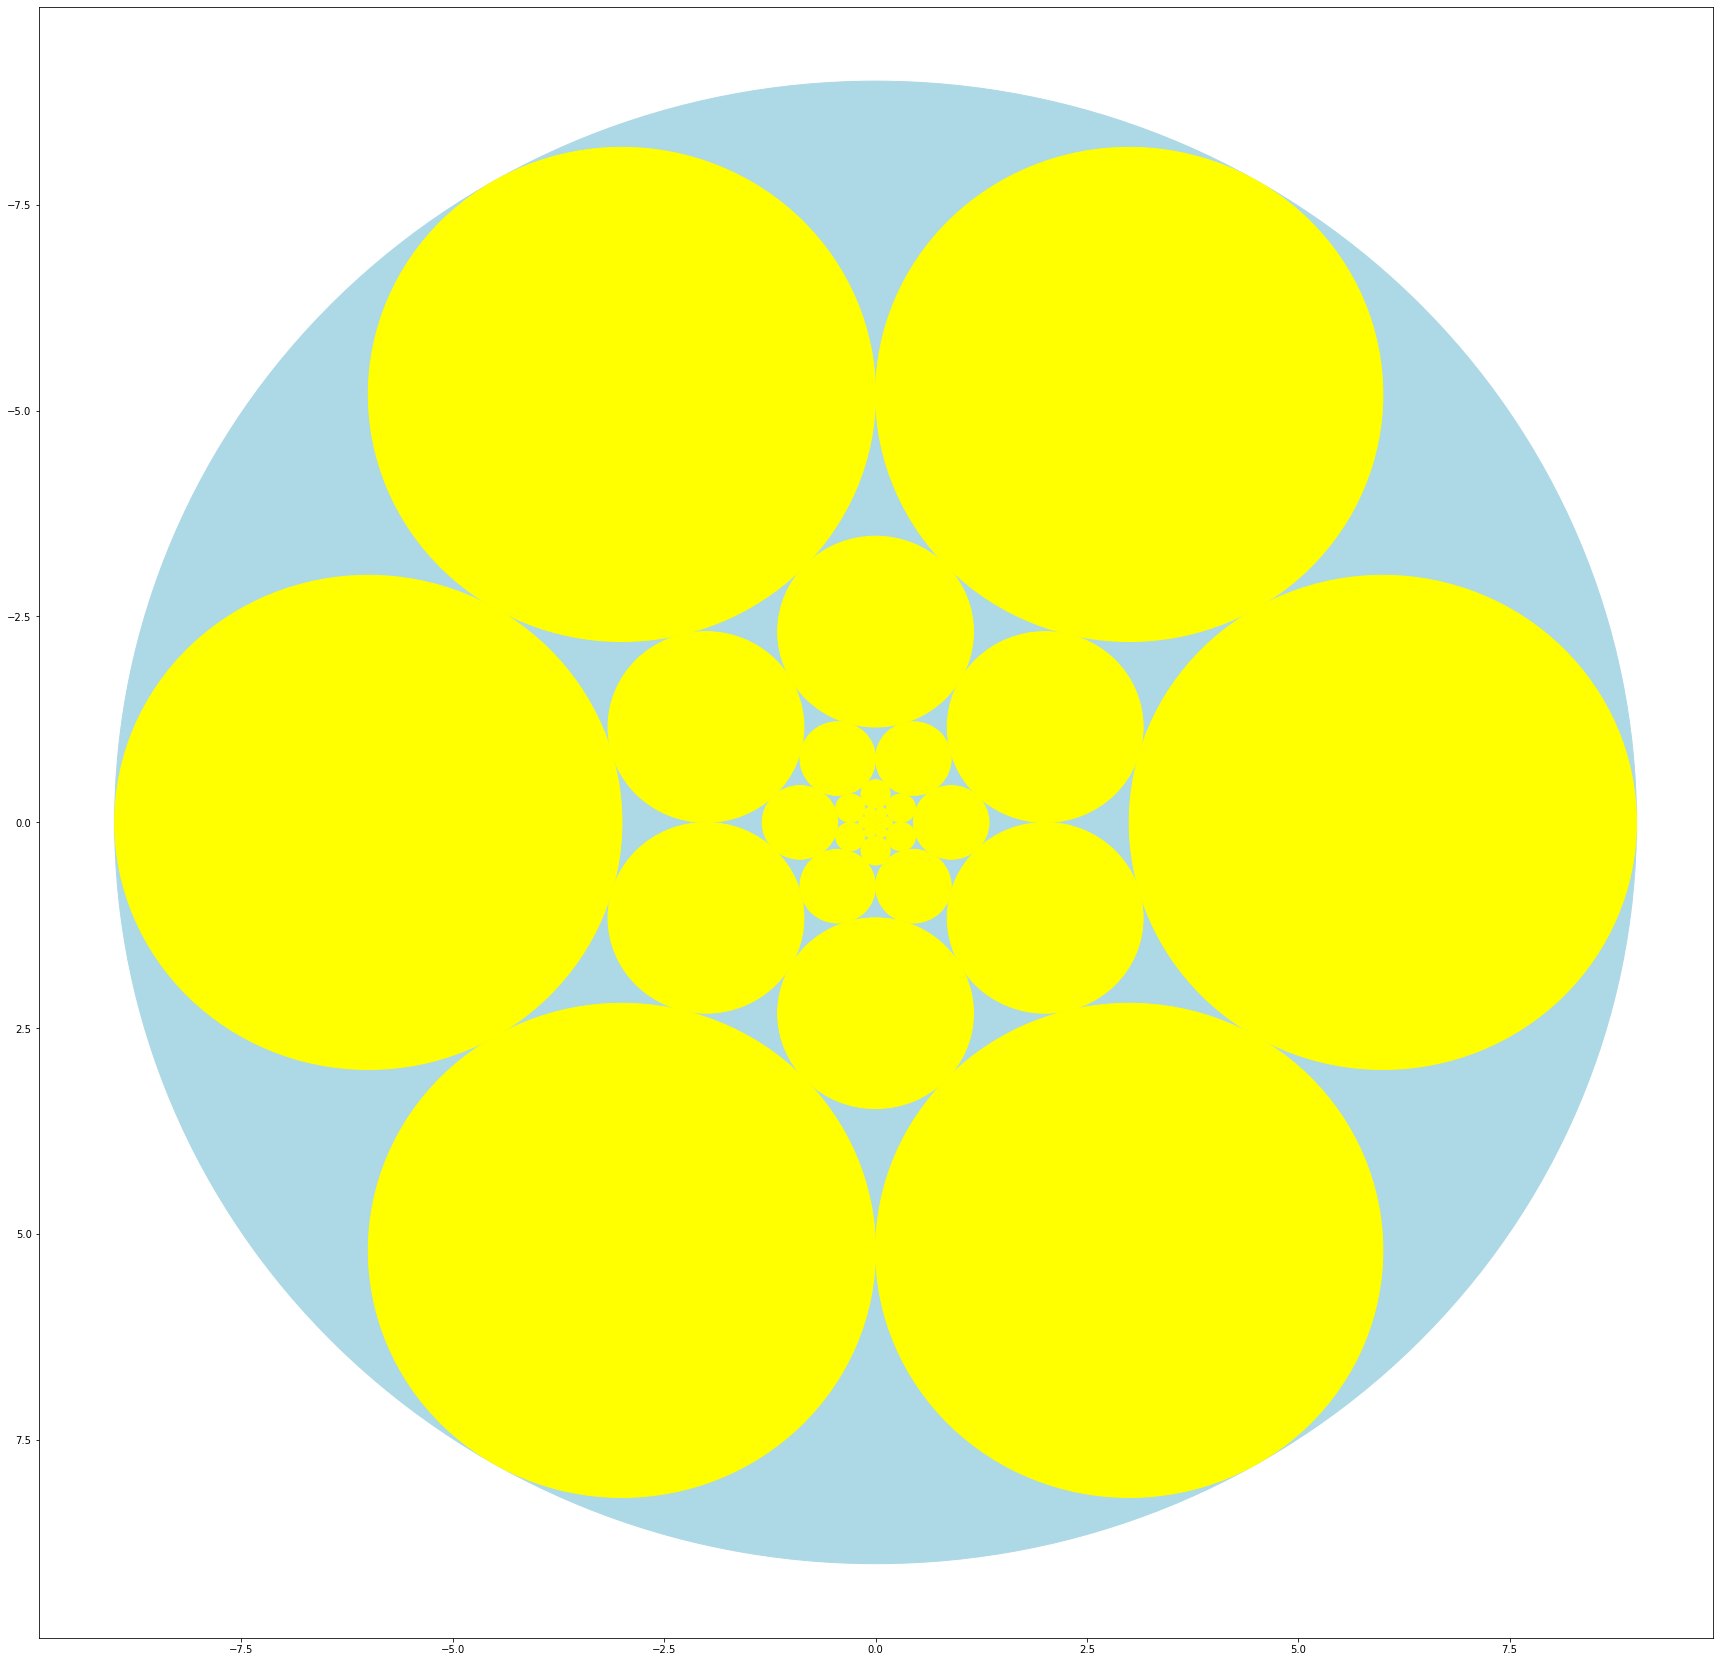

Total yellow area: 199.367261
Yellow percentage: 0.78346382780934709089


In [2]:
RADIUS = 9

outer_circle = (0,0,RADIUS)

plt.ylim(top = -(RADIUS*1.1), bottom = RADIUS*1.1)
plt.xlim(left = -(RADIUS*1.1), right = RADIUS*1.1)
fig = plt.gcf()
fig.set_size_inches(30, 30)

oc=plt.Circle((outer_circle[0], outer_circle[1]),outer_circle[2],color='lightblue')
fig.gca().add_artist(oc)

circles = [(-RADIUS/3*2,0,RADIUS/3,0)]

for i in range(100):
    prev_c = circles[-1]
    r = abs(sqrt(prev_c[0]**2+prev_c[1]**2))/2*3
    b = 2/9*(-2*sqrt(sqrt(3)*r**2 + r**2)+2*sqrt(3)*r+r)
    if prev_c[-1] == 0:
        x, y = rotate_point(-b, 0, 0, 0, 30)
        circles.append((x, y, b/2, 1))
    else:
        circles.append((-b, 0, b/2, 0))

counter = 0
total_area = 0
for c in circles:
    counter += 1
    area = pi*c[2]**2*6
    total_area += area
    percentage = total_area/(RADIUS**2*pi)
    #print('Circles %i, area: %f, total area: %f, total percentage: %1.20f'%(counter, area, total_area, percentage))
    for deg in [0, 60, 120, 180, 240, 300]:
        x, y = rotate_point(c[0], c[1], 0, 0, deg)
        oc = plt.Circle((x, y), c[2], color = 'yellow')
        fig.gca().add_artist(oc)

plt.show()

print('Total yellow area: %f'%total_area)
print('Yellow percentage: %1.20f'%percentage)

## A wrong solution

Intuitively, we might assume that the optimal way of arranging the circles looks differently. I have also implemented a second way of arranging the circles, which leads to a lower filled percentage.

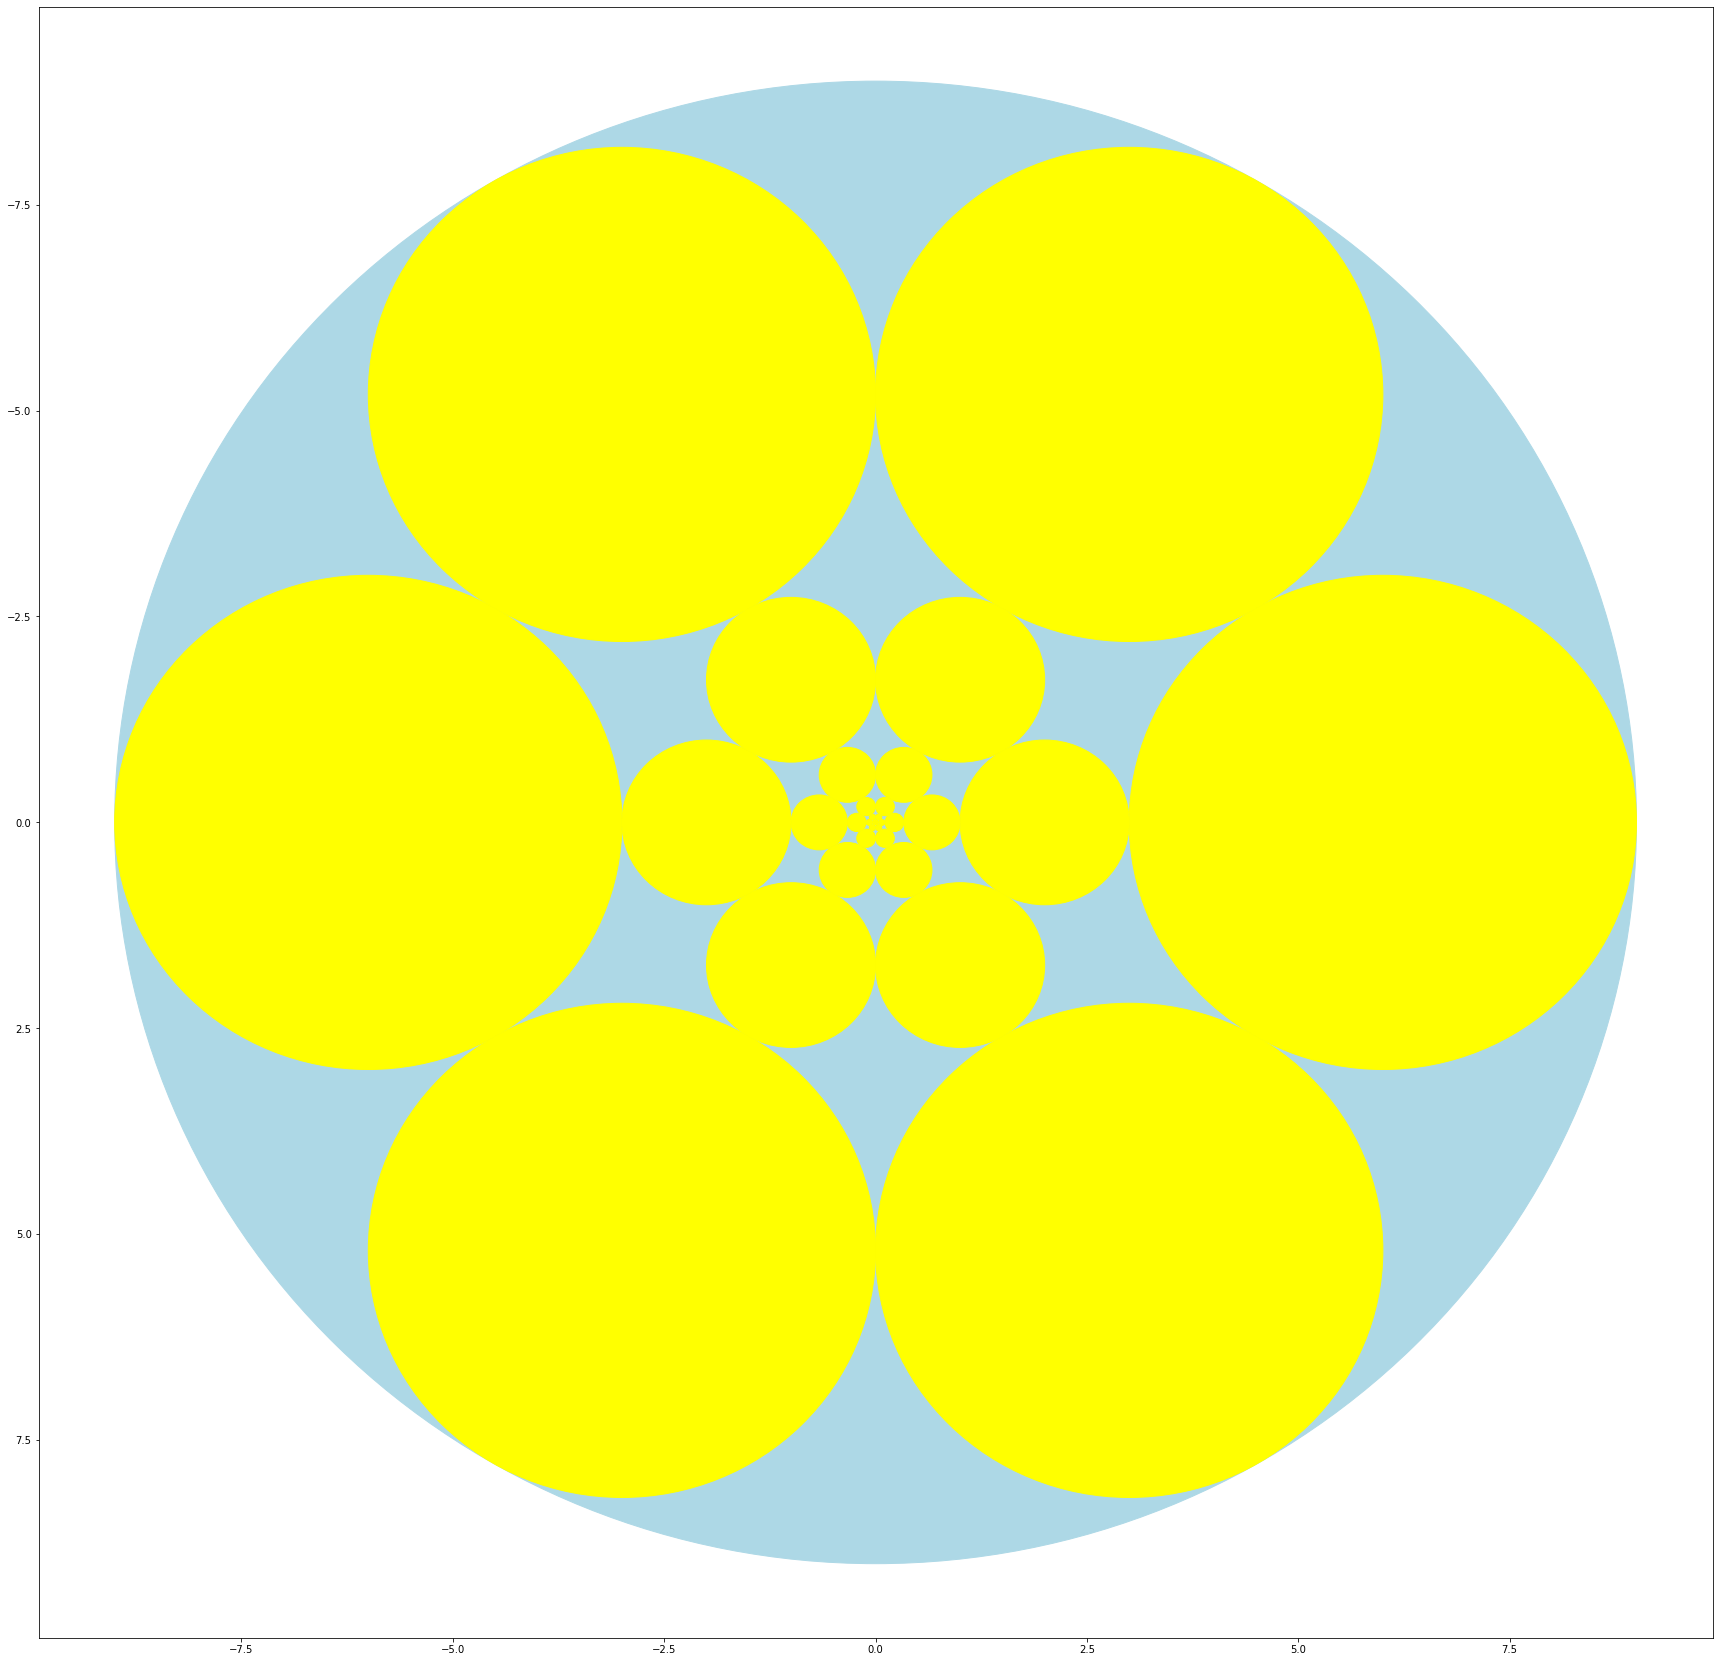

Total yellow area: 190.851754
Yellow percentage: 0.75000000000000011102


In [3]:
outer_circle = (0,0,RADIUS)

plt.clf()
plt.ylim(top = -(RADIUS*1.1), bottom = RADIUS*1.1)
plt.xlim(left = -(RADIUS*1.1), right = RADIUS*1.1)
fig = plt.gcf()
fig.set_size_inches(30, 30)

oc=plt.Circle((outer_circle[0], outer_circle[1]),outer_circle[2],color='lightblue')
fig.gca().add_artist(oc)

circles = [(-RADIUS/3*2,0,RADIUS/3,0)]

for i in range(100):
    prev_c = circles[-1]
    r = abs(sqrt(prev_c[0]**2+prev_c[1]**2))/2*3
    b = prev_c[2]*2/3
    circles.append((-b, 0, b/2, 0))

counter = 0
total_area = 0
for c in circles:
    counter += 1
    area = pi*c[2]**2*6
    total_area += area
    percentage = total_area/(RADIUS**2*pi)
    #print('Circles %i, area: %f, total area: %f, total percentage: %1.20f'%(counter, area, total_area, percentage))
    for deg in [0, 60, 120, 180, 240, 300]:
        x, y = rotate_point(c[0], c[1], 0, 0, deg)
        oc = plt.Circle((x, y), c[2], color = 'yellow')
        fig.gca().add_artist(oc)

plt.show()

print('Total yellow area: %f'%total_area)
print('Yellow percentage: %1.20f'%percentage)